<div class="alert alert-info">
<b>Персонализaция предложения постоянным клиентам для интернет магазина «В один клик»</b>
</div>

<div class="alert alert-info">
<b>Задача:</b>
<br>Разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.
<br>
<b>Данные:</b>
<br>
<br>Дано 4 таблицы 
<br>1. Файл market_file.csv  содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении:
<br>id — номер покупателя в корпоративной базе данных.
<br>Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
<br>Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
<br>Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
<br>Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
<br>Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
<br>Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
<br>Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
<br>Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
<br>Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
<br>Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
<br>Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.ризнак (менее_2_лет, более_2_лет).
<br>
<br>2. Файл market_money.csv таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом:
<br>id — номер покупателя в корпоративной базе данных.
<br>Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
<br>Выручка — сумма выручки за период.
<br>
<br>3.Файл market_time.csv таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода:
<br>id — номер покупателя в корпоративной базе данных.
<br>Период — название периода, во время которого зафиксировано общее время.
<br>минут — значение времени, проведённого на сайте, в минутах.
<br>
<br>4. Файл money.csv таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
<br>id — номер покупателя в корпоративной базе данных.
<br>Прибыль — значение прибыли.
<br>  
<b>Инструкция:</b>
<br>Разработать модель, которая предскажет вероятность снижения покупательской активности.
<br>Выделить сегмент покупателей, проанализировать его и предложить, как увеличить его покупательскую активность

## Загрузка данных

In [1]:
!pip install shap

     |████████████████████████████████| 539 kB 2.5 MB/s eta 0:00:01


In [2]:
pip install phik

     |████████████████████████████████| 686 kB 2.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


<div class="alert alert-info">
<b>Комментарий:</b>
<br>Импортируем библиотеки.
</div>

In [3]:
import pandas as df

import matplotlib.pyplot as pd

from matplotlib import pyplot as plt

import seaborn as sns, numpy as np

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import (OneHotEncoder, 
                                   OrdinalEncoder, 
                                   StandardScaler,
                                   MinMaxScaler, 
                                   RobustScaler,
                                   PolynomialFeatures)

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score

from sklearn.model_selection import RandomizedSearchCV

import warnings

warnings.filterwarnings("ignore")
from sklearn.metrics import f1_score

import shap

from sklearn.feature_selection import SelectKBest, f_classif

from phik.report import plot_correlation_matrix

from phik import report

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Загружаем датасет '/datasets/market_file.csv' и сохраняем его в 'data_1' после выводим о нем информацию.
</div>

In [4]:
data_1 = df.read_csv('/datasets/market_file.csv')
data_1.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [5]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br> Таблица 'data_1' содержит 1300 строк и 13 столбцов. Все данные соответсвтвуют свои типам.
</div>

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Загружаем датасет '/datasets/market_money.csv' и сохраняем его в 'data_2' после выводим о нем информацию.
</div>

In [6]:
data_2 = df.read_csv('/datasets/market_money.csv')
data_2.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [7]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br> Таблица 'data_2' содержит 3900 строк и 3 столбца. Все данные соответсвтвуют свои типам.
</div>

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Загружаем датасет '/datasets/market_time.csv' и сохраняем его в 'data_3' после выводим о нем информацию.
</div>

In [8]:
data_3 = df.read_csv('/datasets/market_time.csv')
data_3.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [9]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br> Таблица 'data_3' содержит 2600 строк и 3 столбца. Все данные соответсвтвуют свои типам.
</div>

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Загружаем датасет '/datasets/money.csv' и сохраняем его в 'data_4' после выводим о нем информацию.
</div>

In [10]:
data_4 = df.read_csv('/datasets/money.csv',sep=';',decimal =',')
data_4.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


In [11]:
data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br> Таблица 'data_4' содержит 1300 строк и 2 столбца. Все данные соответсвтвуют свои типам.
</div>

<div class="alert alert-info">
<b>Вывод главы:</b>
<br>Было создано 4 таблицы. 
<br> 1.data_1 - поведение покупателей на сайте.
<br> 2.data_2 - данные о выручке.
<br> 3.data_3 - время проведенное покупателями на сайте.
<br> 3.data_4 - среднемеячная прибыль.  
<br>Все данные в таблицах соответсвтвуют свои типам.  
</div>

##  Предобработка данных

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Проверяем data_1 на наличие пропусков и дубликатов. При наличии убираем их.
</div>

In [12]:
data_1.isna().sum()

id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64

In [13]:
data_1.duplicated().sum()

0

In [14]:
data_1 = data_1.rename(columns = {'Покупательская активность' : 'покупательская_активность',
                                  'Тип сервиса' : 'тип_сервиса',
                                  'Разрешить сообщать' : 'разрешить_сообщать',
                                  'Маркет_актив_6_мес' : 'маркет_актив_6_мес',
                                  'Маркет_актив_тек_мес' : 'маркет_актив_тек_мес',
                                  'Длительность' : 'длительность',
                                  'Акционные_покупки' : 'акционные_покупки',
                                  'Популярная_категория' : 'популярная_категория',
                                  'Средний_просмотр_категорий_за_визит' : 'cредний_просмотр_категорий_за_визит',
                                  'Неоплаченные_продукты_штук_квартал' : 'неоплаченные_продукты_штук_квартал',
                                  'Ошибка_сервиса' : 'ошибка_сервиса',
                                  'Страниц_за_визит' : 'cтраниц_за_визит'})
                                  

In [15]:
data_1['покупательская_активность'] = data_1['покупательская_активность'].str.lower()
data_1['популярная_категория'] = data_1['популярная_категория'].str.lower()

In [16]:
data_1['покупательская_активность'].unique()

array(['снизилась', 'прежний уровень'], dtype=object)

In [17]:
data_1['тип_сервиса'].unique()

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

In [18]:
data_1['тип_сервиса'].replace('стандартт', 'стандарт', inplace=True)
data_1['тип_сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

In [19]:
data_1['разрешить_сообщать'].unique()

array(['да', 'нет'], dtype=object)

In [20]:
data_1['популярная_категория'].unique()

array(['товары для детей', 'домашний текстиль', 'косметика и аксесуары',
       'техника для красоты и здоровья', 'кухонная посуда',
       'мелкая бытовая техника и электроника'], dtype=object)

In [21]:
data_1.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,cредний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,cтраниц_за_визит
0,215348,снизилась,премиум,да,3.4,5,121,0.00,товары для детей,6,2,1,5
1,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5
2,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5
3,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,0,6,4
4,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2


<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br>Пропусков и дубликовтов в таблице 'dsta_1' не обнаруженно. Текст и название столбцоы были приведены в удобный формат.
</div>

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Проверяем data_2 на наличие пропусков и дубликатов. При наличии убираем их.
</div>

In [22]:
data_2.isna().sum()

id         0
Период     0
Выручка    0
dtype: int64

In [23]:
data_2.duplicated().sum()

0

In [24]:
data_2 = data_2.rename(columns = {'Период' : 'период',
                                  'Выручка' : 'выручка'})

In [25]:
data_2['период'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

In [26]:
data_2.head()

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br>Пропусков и дубликовтов в таблице 'dsta_2' не обнаруженно. Текст и название столбцоы были приведены в удобный формат.
</div>

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Проверяем data_3 на наличие пропусков и дубликатов. При наличии убираем их.
</div>

In [27]:
data_3.isna().sum()

id        0
Период    0
минут     0
dtype: int64

In [28]:
data_3.duplicated().sum()

0

In [29]:
data_3 = data_3.rename(columns = {'Период' : 'период'})

In [30]:
data_3['период'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

In [31]:
data_3['период'].replace('предыдцщий_месяц', 'предыдущий_месяц', inplace=True)
data_3['период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

In [32]:
data_3.head()

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдущий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдущий_месяц,12
4,215350,текущий_месяц,13


<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br>Пропусков и дубликовтов в таблице 'dsta_3' не обнаруженно. Текст и название столбцоы были приведены в удобный формат.
</div>

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Проверяем data_4 на наличие пропусков и дубликатов. При наличии убираем их.
</div>

In [33]:
data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [34]:
data_4.isna().sum()

id         0
Прибыль    0
dtype: int64

In [35]:
data_4.duplicated().sum()

0

In [36]:
data_4 = data_4.rename(columns = {'Прибыль' : 'прибыль'})

In [37]:
data_4.head()

,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br>Пропусков и дубликовтов в таблице 'dsta_4' не обнаруженно. Текст и название столбцоы были приведены в удобный формат.
</div>

<div class="alert alert-info">
<b>Вывод главы:</b> 
<br> При переработке данных во всех 4х таблицах были переработаны названия столбцов на более комфортные, дубликаты, неявные бубликаты и пропуски были не обнаружены. Текст в таблицах приведен в нижний регистр.
</div>

## Исследовательский анализ данных

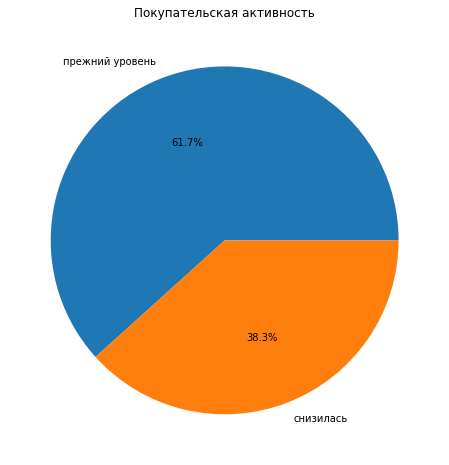

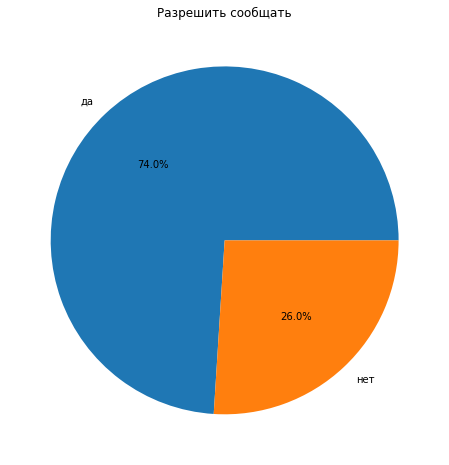

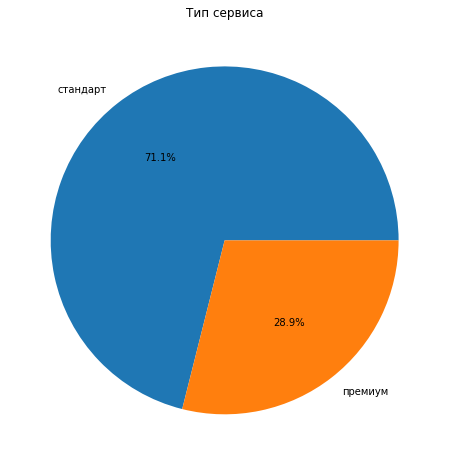

In [38]:
data_1['покупательская_активность'].value_counts().plot(y='subscription_type', kind='pie',figsize=(8,8), autopct='%1.1f%%')
pd.title("Покупательская активность")
pd.ylabel("")
pd.show()

data_1['разрешить_сообщать'].value_counts().plot(y='subscription_type', kind='pie',figsize=(8,8), autopct='%1.1f%%')
pd.title("Разрешить сообщать")
pd.ylabel("")
pd.show()

data_1['тип_сервиса'].value_counts().plot(y='subscription_type', kind='pie',figsize=(8,8), autopct='%1.1f%%')
pd.title("Тип сервиса")
pd.ylabel("")
pd.show()

<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br>У 38% пользователей снизилась покупательская активность, у 62-х% она осталась на прежнем уровне. 
<br>74% процента пользователей согласны на рассылку предложений.
<br>Премиум есть у 71% пользователей.
</div>

In [39]:
def descrebes(a,b,c,d,):
    a.describe()
    a.hist()
    pd.title(b)
    pd.xlabel(c)
    pd.ylabel(d)
    pd.show()
def boxplots(a,b,c,d,f):
    a.boxplot(b) 
    pd.title(c)
    pd.xlabel(d)
    pd.ylabel(f)
    pd.show()
def plots(a,b,c,d,x,z):
    a.value_counts(ascending= True).plot(kind= 'barh',figsize= (x,z),title= d,)
    plt.xlabel(b)
    plt.ylabel(c)
    plt.show()

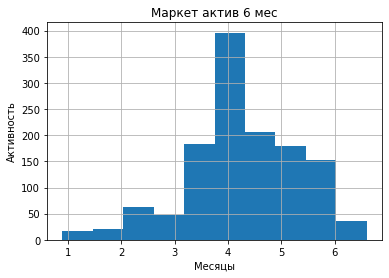

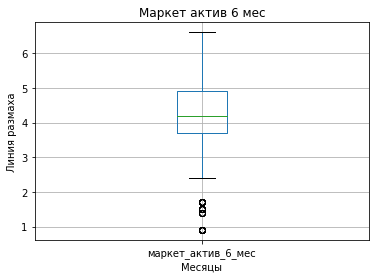

In [40]:
descrebes(data_1['маркет_актив_6_мес'],"Маркет актив 6 мес","Месяцы","Активность")
boxplots(data_1, 'маркет_актив_6_мес',"Маркет актив 6 мес","Месяцы","Линия размаха")

<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br>Самым активным у пользователей является 4 месяц из последних шести. После начался резкий спад.
</div>

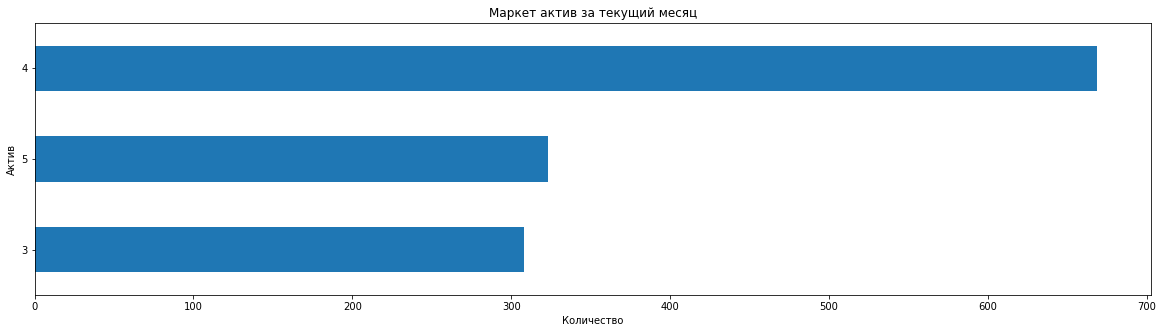

In [41]:
plots(data_1['маркет_актив_тек_мес'],'Количество','Актив', 'Маркет актив за текущий месяц', 20, 5)

<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br>В основном пользователи совершают четыре маркетинговые операции за месяц. 
</div>

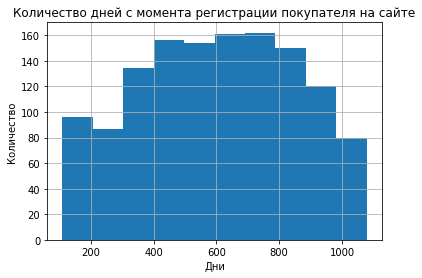

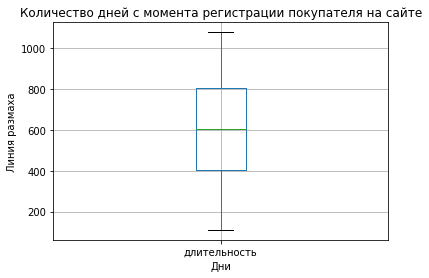

In [42]:
descrebes(data_1['длительность'],"Количество дней с момента регистрации покупателя на сайте","Дни","Количество")
boxplots(data_1, 'длительность',"Количество дней с момента регистрации покупателя на сайте","Дни","Линия размаха")

<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br>В основном пользователи польуються сайтом от 2.5 до 1.5 лет.  
</div>

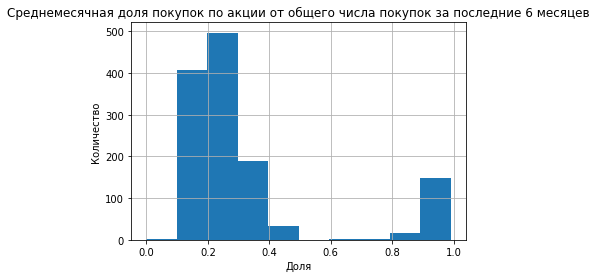

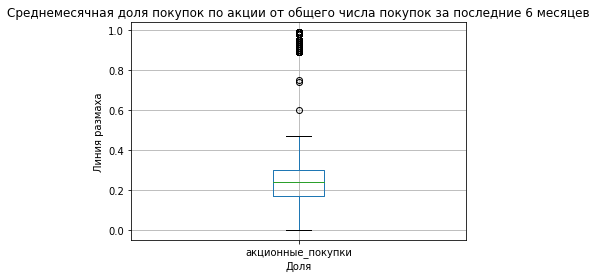

In [43]:
descrebes(data_1['акционные_покупки'],"Cреднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев","Доля","Количество")
boxplots(data_1, 'акционные_покупки',"Cреднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев","Доля","Линия размаха")

<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br>24 - 30 % покупок приходиться на акционный товар.  
</div>

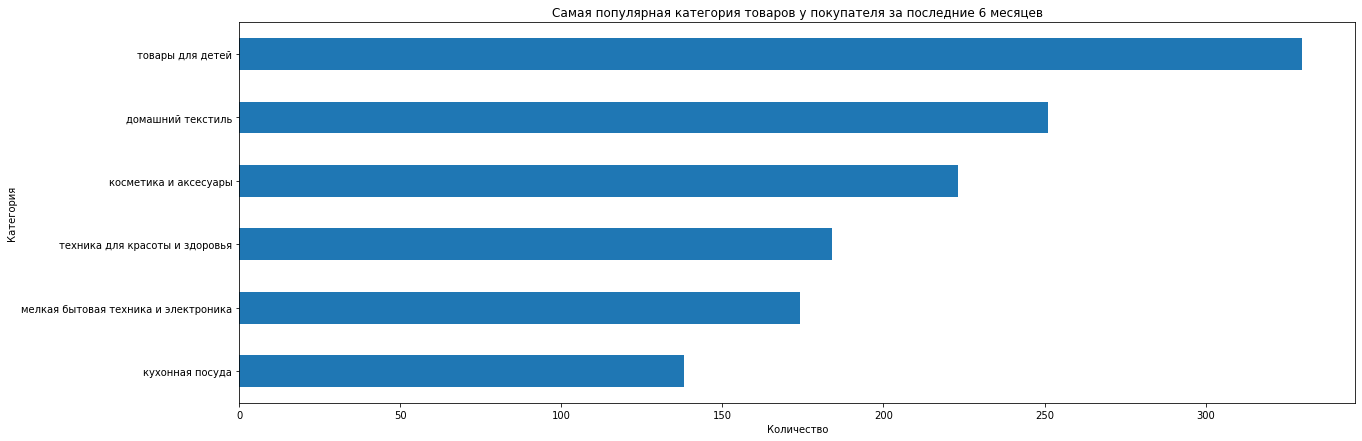

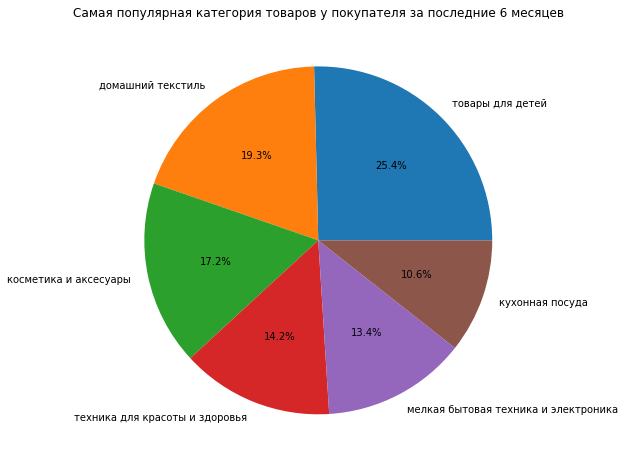

In [44]:
plots(data_1['популярная_категория'],'Количество','Категория', 'Самая популярная категория товаров у покупателя за последние 6 месяцев', 20, 7)
data_1['популярная_категория'].value_counts().plot(y='subscription_type', kind='pie',figsize=(8,8), autopct='%1.1f%%')
pd.title("Самая популярная категория товаров у покупателя за последние 6 месяцев")
pd.ylabel("")
pd.show()

<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br>Топ 3 популярных категорий на сайте это:
<br>1. товары для детей - 25.4% от всего товарооборота.
<br>2. домашний текстиль - 19.3% от всего товарооборота.
<br>3. косметика и аксесуары - 17.2 от всего товарооборота.
</div>

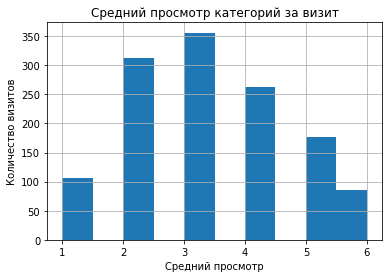

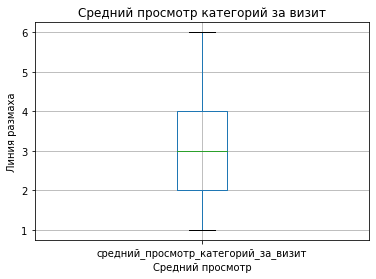

In [45]:
descrebes(data_1['cредний_просмотр_категорий_за_визит'],"Средний просмотр категорий за визит","Средний просмотр","Количество визитов")
boxplots(data_1, 'cредний_просмотр_категорий_за_визит',"Средний просмотр категорий за визит","Средний просмотр","Линия размаха")

<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br>За один визит пользователь заходит в 3 категории.
</div>

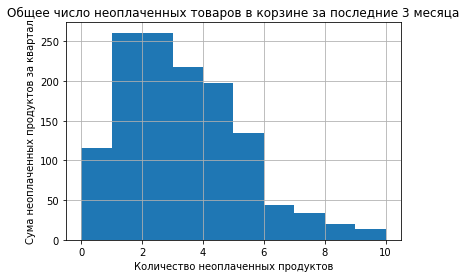

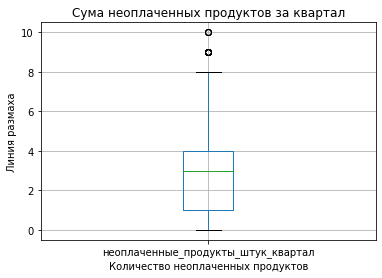

In [46]:
descrebes(data_1['неоплаченные_продукты_штук_квартал'],"Общее число неоплаченных товаров в корзине за последние 3 месяца","Количество неоплаченных продуктов","Сума неоплаченных продуктов за квартал")
boxplots(data_1, 'неоплаченные_продукты_штук_квартал',"Сума неоплаченных продуктов за квартал","Количество неоплаченных продуктов","Линия размаха")

<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br>Пользователи оставляют в корзине 1-2 неоплаченых товара. Есть и аномальные показатели это 9-10 неоплаченых товаров, это могуть быть категории людей которых можно отнести к шопоголикам или те люди которые используют корзину весто вкладки избранное.
</div>

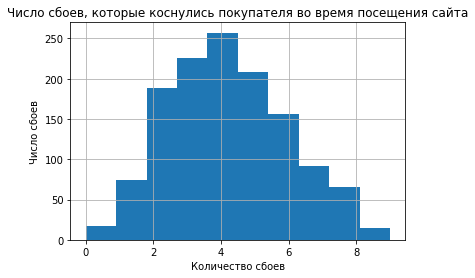

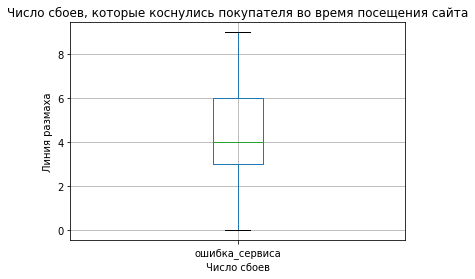

In [47]:
descrebes(data_1['ошибка_сервиса'],"Число сбоев, которые коснулись покупателя во время посещения сайта","Количество сбоев","Число сбоев")
boxplots(data_1, 'ошибка_сервиса',"Число сбоев, которые коснулись покупателя во время посещения сайта","Число сбоев","Линия размаха")

<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br>Обычно покупатель сталкиваетя с 3-4 сбоями за сеанс.
</div>

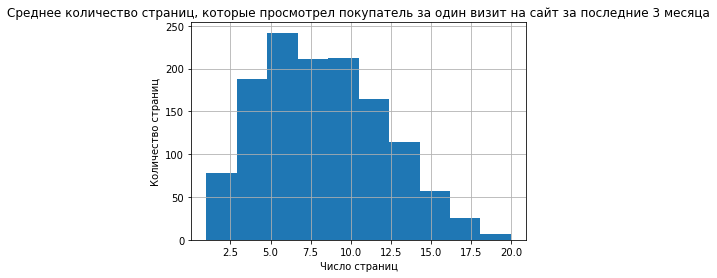

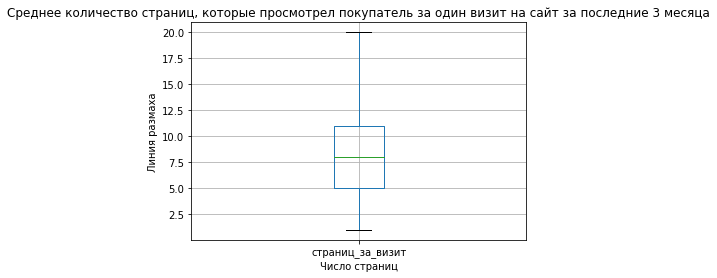

In [48]:
descrebes(data_1['cтраниц_за_визит'],"Среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца","Число страниц","Количество страниц")
boxplots(data_1, 'cтраниц_за_визит',"Среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца","Число страниц","Линия размаха")

<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br>В среднем пользователи заходят на 6 страниц с товаром. Если вспомнить про 3 популярные категории можно предположить что покупатель просматривает по 2 популярных товара каждой категории.
</div>

In [49]:
data_2.head()

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


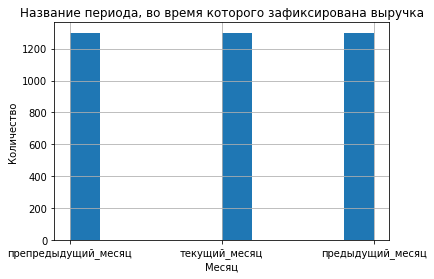

In [50]:
descrebes(data_2['период'],"Название периода, во время которого зафиксирована выручка","Месяц","Количество")

<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br>Периоды расспределены равномерно.
</div>

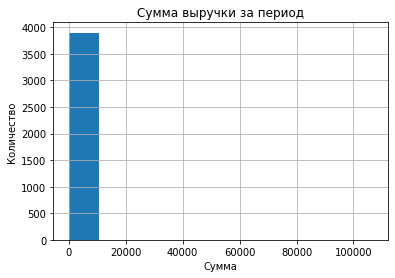

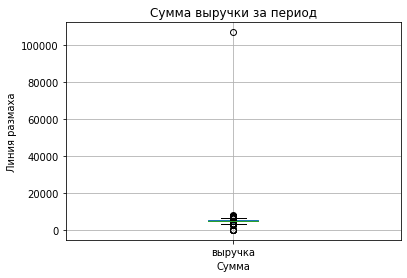

In [51]:
descrebes(data_2['выручка'],"Сумма выручки за период","Сумма","Количество")
boxplots(data_2, 'выручка',"Сумма выручки за период","Сумма","Линия размаха")

<div class="alert alert-info">
<b>Коментарий:</b>
<br>Убираем сильно выбивающиеся значение.
</div>

In [52]:
data_2[data_2['выручка'] > 50000]

,id,период,выручка
98,215380,текущий_месяц,106862.2


In [53]:
data_2 = data_2[data_2['выручка'] < 50000]

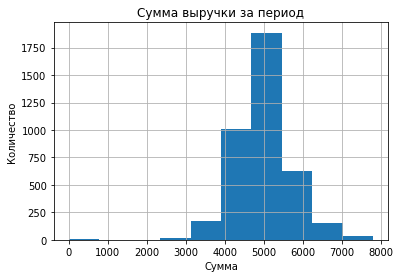

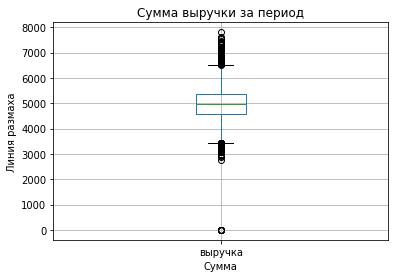

In [54]:
descrebes(data_2['выручка'],"Сумма выручки за период","Сумма","Количество")
boxplots(data_2, 'выручка',"Сумма выручки за период","Сумма","Линия размаха")

<div class="alert alert-info">
<b>Коментарий:</b>
<br>Так-же уберем бесполезные значения.
</div>

In [55]:
data_2[data_2['выручка'] < 1]

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


In [56]:
data_2 = data_2[data_2['выручка'] > 1]

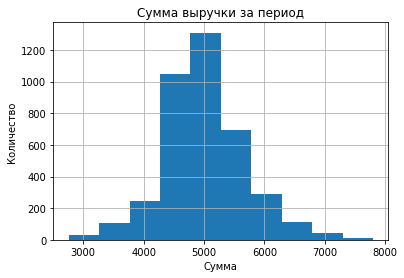

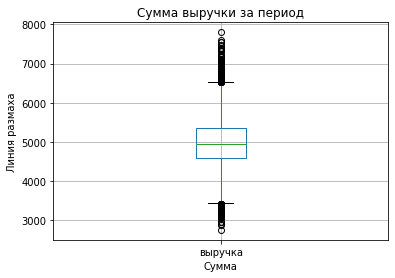

In [57]:
descrebes(data_2['выручка'],"Сумма выручки за период","Сумма","Количество")
boxplots(data_2, 'выручка',"Сумма выручки за период","Сумма","Линия размаха")

<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br>В основном один покупатель приносит выручку в 5000р. Есть и выбросы но они вполне реальны.
</div>

In [58]:
data_3.head()

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдущий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдущий_месяц,12
4,215350,текущий_месяц,13


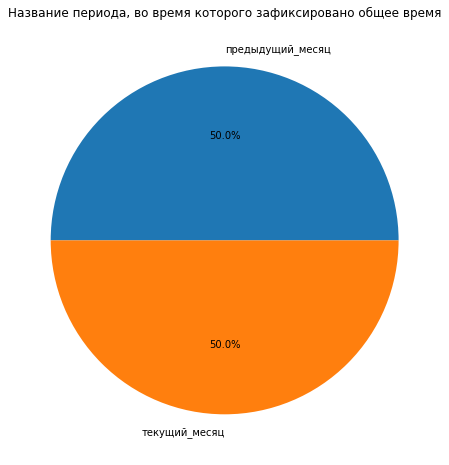

In [59]:
data_3['период'].value_counts().plot(y='subscription_type', kind='pie',figsize=(8,8), autopct='%1.1f%%')
pd.title("Название периода, во время которого зафиксировано общее время")
pd.ylabel("")
pd.show()

<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br>Периоды расспределены равномерно.
</div>

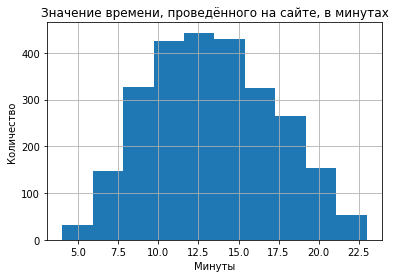

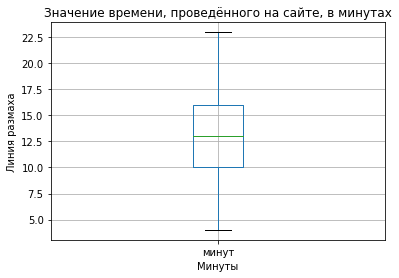

In [60]:
descrebes(data_3['минут'],"Значение времени, проведённого на сайте, в минутах","Минуты","Количество")
boxplots(data_3, 'минут',"Значение времени, проведённого на сайте, в минутах","Минуты","Линия размаха")

<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br>Обычно пользователи проводят на сайте от 10 до 15 минут.
</div>

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

In [61]:
data_4.head()

,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


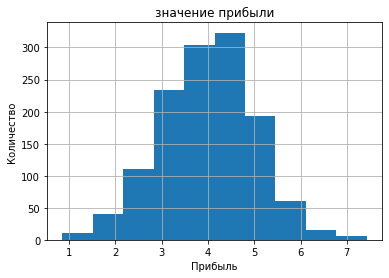

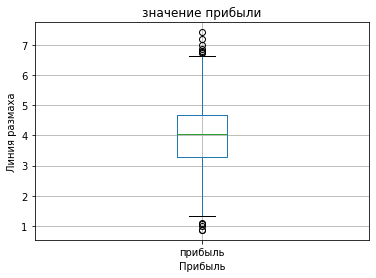

In [62]:
descrebes(data_4['прибыль'],"значение прибыли","Прибыль","Количество")
boxplots(data_4, 'прибыль',"значение прибыли","Прибыль","Линия размаха")

<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br>В среднем покупатель приности прибыль в размере 3.5 - 4.8т.р. за период.
</div>

<div class="alert alert-info">
<b>Вывод главы:</b>
<br>Среднестатистический пользователь сайта посещяет его 10 - 15 минут. За это время он посещает 6 страниц с товаром, и может добавить в корзину товаров из 3х основных категорий (товары для детей, домашний текстиль, косметика и аксесуары). 
</div>

## Объединение таблиц

<div class="alert alert-info">
<b>Коментарий:</b>
<br>Перед объединением таблиц выберем тех пользователей которые поещали сайт в течении 3х последных месяцев.
</div>

In [63]:
count_p = {'период': ['count']}
grouped = data_2.groupby('id').agg(count_p)
grouped.columns = ['count']

grouped = grouped[grouped['count'] == 3]
data_1 = data_1[data_1['id'].isin(grouped.index)]
len(data_1)

1296

<div class="alert alert-info">
<b>Коментарий:</b>
<br>Создадим из значений в периоде новые столбцы.
</div>

In [64]:
data_2.head()

,id,период,выручка
1,215348,текущий_месяц,3293.1
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0


In [65]:
data_2 = data_2.pivot_table(index='id', columns='период', values='выручка', aggfunc='sum')
data_2.head()

период,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
id,,,
215348,NaN,NaN,3293.1
215349,5216.0,4472.0,4971.6
215350,5457.5,4826.0,5058.4
215351,6158.0,4793.0,6610.4
215352,5807.5,4594.0,5872.5


In [66]:
data_2 = data_2.rename(columns = {'предыдущий_месяц':'выручка_за_предыдущий_месяц',
                                 'препредыдущий_месяц':'выручка_за_препредыдущий_месяц',
                                 'текущий_месяц':'выручка_за_текущий_месяц'})
data_2.head(1)

период,выручка_за_предыдущий_месяц,выручка_за_препредыдущий_месяц,выручка_за_текущий_месяц
id,,,
215348,NaN,NaN,3293.1


<div class="alert alert-info">
<b>Коментарий:</b>
<br>Объединим таблицы 'data_1' и 'data_2'
</div>

In [67]:
data = df.merge(data_1, data_2, on="id")
data.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,cредний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,cтраниц_за_визит,выручка_за_предыдущий_месяц,выручка_за_препредыдущий_месяц,выручка_за_текущий_месяц
0,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5,5216.0,4472.0,4971.6
1,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4
2,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,0,6,4,6158.0,4793.0,6610.4
3,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2,5807.5,4594.0,5872.5
4,215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5


<div class="alert alert-info">
<b>Коментарий:</b>
<br>Создадим из значений в периоде новые столбцы.
</div>

In [68]:
data_3.head()

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдущий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдущий_месяц,12
4,215350,текущий_месяц,13


In [69]:
data_3 = data_3.pivot_table(index='id', columns='период', values='минут', aggfunc='sum')
data_3.head()

период,предыдущий_месяц,текущий_месяц
id,,
215348,13,14
215349,12,10
215350,8,13
215351,11,13
215352,8,11


In [70]:
data_3 = data_3.rename(columns = {'предыдущий_месяц':'время_на_сайте_за_предыдущий_месяц_мин',
                                 'текущий_месяц':'время_на_сайте_за_текущий_месяц_мин'})
data_3.head(1)

период,время_на_сайте_за_предыдущий_месяц_мин,время_на_сайте_за_текущий_месяц_мин
id,,
215348,13,14


<div class="alert alert-info">
<b>Коментарий:</b>
<br>Объединим таблицы 'data' и 'data_3'
</div>

In [71]:
data = df.merge(data, data_3, on="id")
data.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,cредний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,cтраниц_за_визит,выручка_за_предыдущий_месяц,выручка_за_препредыдущий_месяц,выручка_за_текущий_месяц,время_на_сайте_за_предыдущий_месяц_мин,время_на_сайте_за_текущий_месяц_мин
0,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


<div class="alert alert-info">
<b>Коментарий:</b>
<br>Смотрим не образовалось ли пропуски.
</div>

In [72]:
data.isna().sum()

id                                        0
покупательская_активность                 0
тип_сервиса                               0
разрешить_сообщать                        0
маркет_актив_6_мес                        0
маркет_актив_тек_мес                      0
длительность                              0
акционные_покупки                         0
популярная_категория                      0
cредний_просмотр_категорий_за_визит       0
неоплаченные_продукты_штук_квартал        0
ошибка_сервиса                            0
cтраниц_за_визит                          0
выручка_за_предыдущий_месяц               0
выручка_за_препредыдущий_месяц            0
выручка_за_текущий_месяц                  0
время_на_сайте_за_предыдущий_месяц_мин    0
время_на_сайте_за_текущий_месяц_мин       0
dtype: int64

<div class="alert alert-info">
<b>Вывод главы:</b>
<br>Таблицы 'data_1','data_2','data_3' были объеденены в одну таблицу 'data'. Пропусков после объединения не обнаружено.
</div>

## Корреляционный анализ

<div class="alert alert-info">
<b>Коментарий:</b>
<br>Строим кореляцию по таблице 'data'
</div>

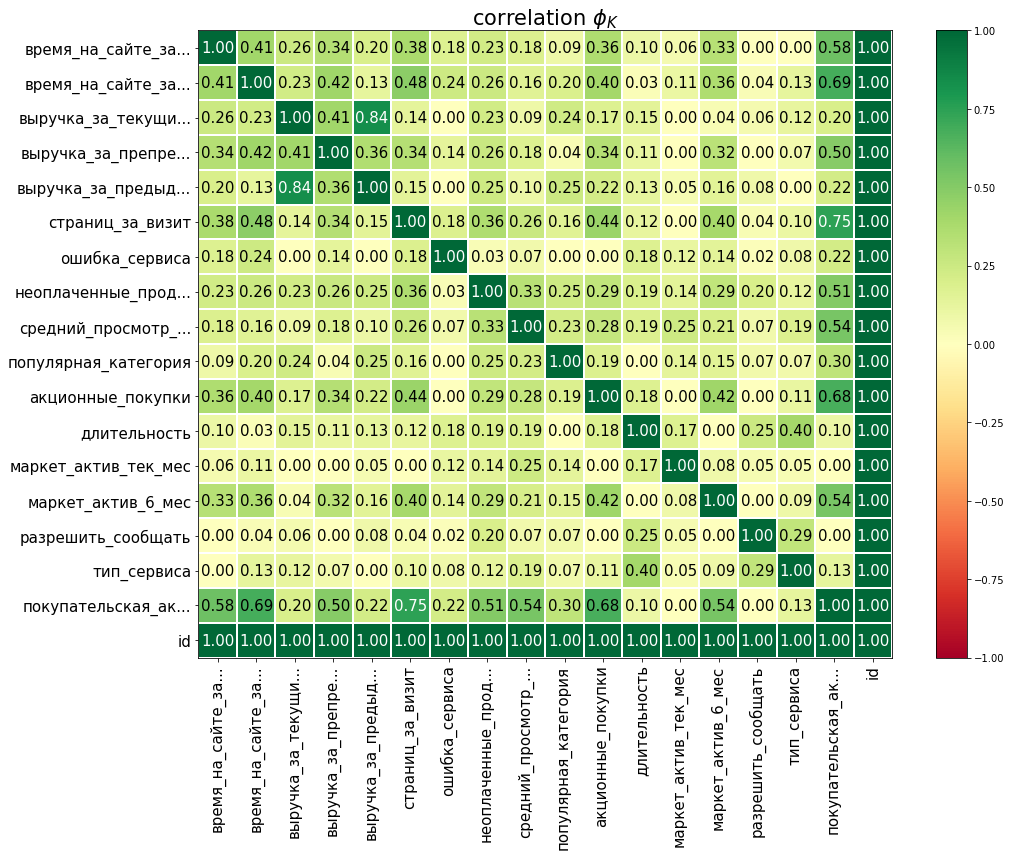

In [73]:
interval_cols = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 
                 'cредний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 
                 'ошибка_сервиса', 'cтраниц_за_визит', 'выручка_за_предыдущий_месяц', 
                 'выручка_за_препредыдущий_месяц', 'выручка_за_текущий_месяц', 
                 'время_на_сайте_за_предыдущий_месяц_мин', 'время_на_сайте_за_текущий_месяц_мин', 
                 'прибыль']

phik_overview = data.phik_matrix(interval_cols=interval_cols)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    title=r"correlation $\phi_K$",
    fontsize_factor=1.5,
    figsize=(15, 12)
)

<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br>Больше всего на кореляцию влияет такие значения как:
<br>1.'выручка_за_предыдущий_месяц'
<br>2.'выручка_за_препредыдущий_месяц'
<br>3.'cтраниц_за_визит'
<br>4.'выручка_за_текущий_месяц'
</div>

<div class="alert alert-info">
<b>Коментарий:</b>
<br>Построим корреляцию по целевым признакам.
</div>

In [74]:
data_remove_activity = data[data['покупательская_активность'] == 'снизилась']

<AxesSubplot:>

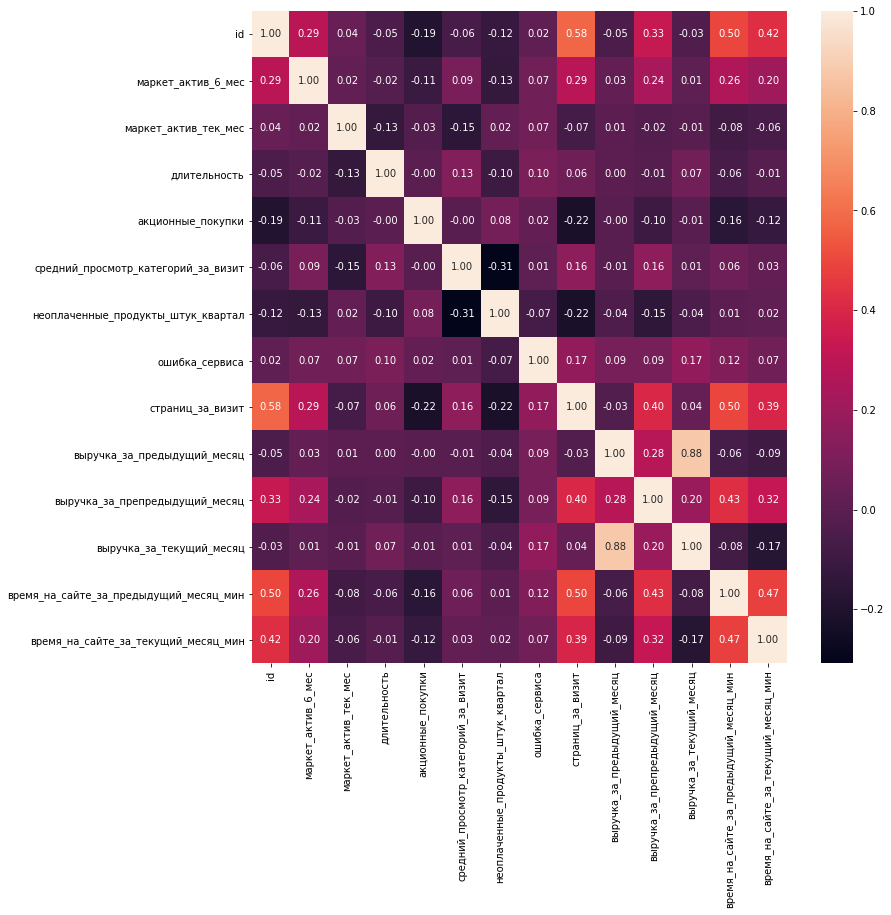

In [75]:
plt.figure(figsize=(12,12))
sns.heatmap(data_remove_activity.corr(), annot=True, fmt='.2f')

In [76]:
data_old = data[data['покупательская_активность'] == 'прежний уровень']

<AxesSubplot:>

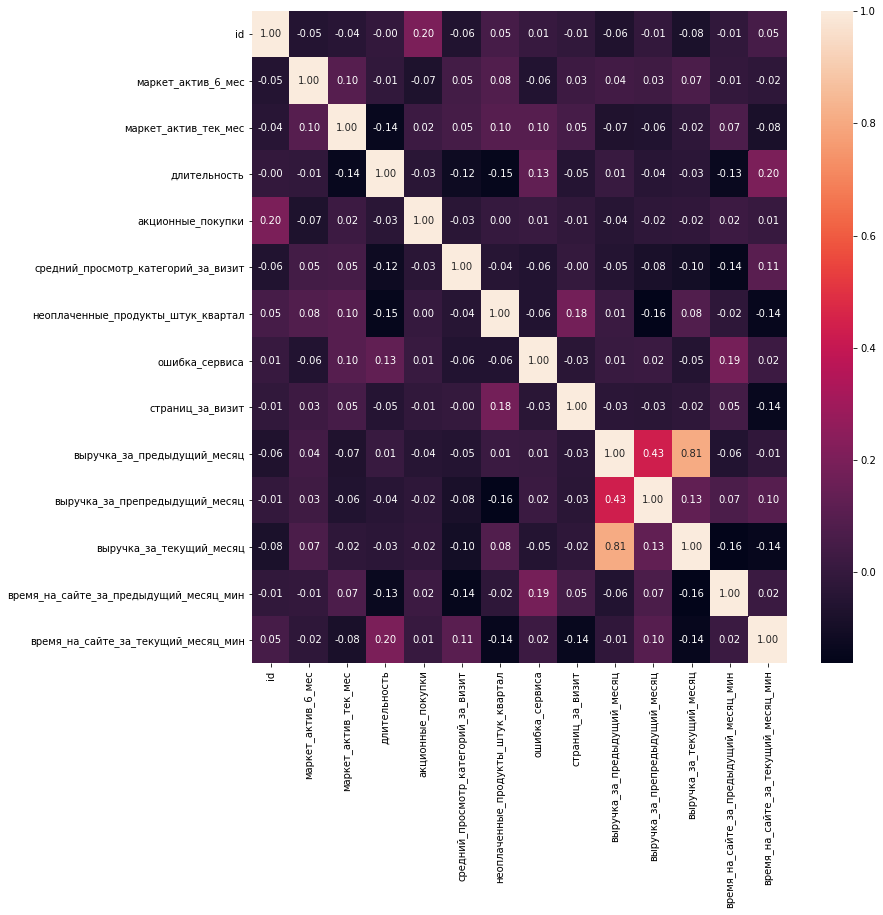

In [77]:
plt.figure(figsize=(12,12))
sns.heatmap(data_old.corr(), annot=True, fmt='.2f')

<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br>Как и ранее оказалось что на корреляцию влияют те самые четыре признака.
</div>

<div class="alert alert-info">
<b>Вывод главы:</b>
<br>Больше всего на корреляцию влияет 4 признака:
<br>1.'выручка_за_предыдущий_месяц'
<br>2.'выручка_за_препредыдущий_месяц'
<br>3.'cтраниц_за_визит'
<br>4.'выручка_за_текущий_месяц'
</div>

## Использование пайплайнов

In [78]:
data.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,cредний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,cтраниц_за_визит,выручка_за_предыдущий_месяц,выручка_за_препредыдущий_месяц,выручка_за_текущий_месяц,время_на_сайте_за_предыдущий_месяц_мин,время_на_сайте_за_текущий_месяц_мин
0,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


<div class="alert alert-info">
<b>Коментарий:</b>
<br>Переведем проценты акционных покупок в категориальный признак. А так-же столбец 'id' превратим в индекс датасета.
</div>

In [79]:
def stock(i):
    if i < 0.50:
        return 'меньше половины товаров по акции'
    if i >= 0.50:
        return 'больше половины товаров по акции'
data['акционные_покупки'] = data['акционные_покупки'].apply(stock)

data = data.set_index('id')
data.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,cредний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,cтраниц_за_визит,выручка_за_предыдущий_месяц,выручка_за_препредыдущий_месяц,выручка_за_текущий_месяц,время_на_сайте_за_предыдущий_месяц_мин,время_на_сайте_за_текущий_месяц_мин
id,,,,,,,,,,,,,,,,,
215349,снизилась,премиум,да,4.4,4,819,больше половины товаров по акции,товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
215350,снизилась,стандарт,нет,4.9,3,539,меньше половины товаров по акции,домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
215351,снизилась,стандарт,да,3.2,5,896,больше половины товаров по акции,товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
215352,снизилась,стандарт,нет,5.1,3,1064,больше половины товаров по акции,товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
215353,снизилась,стандарт,да,3.3,4,762,меньше половины товаров по акции,домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


<div class="alert alert-info">
<b>Коментарий:</b>
<br>Создадим тестовые и тренировочные выборки.
</div>

In [80]:
TEST_SIZE = 0.25
RANDOM_STATE = 42

X = data.drop(['покупательская_активность'], axis=1)
y = data['покупательская_активность']

X_train, X_test, y_train, y_test = train_test_split(X, y
    ,test_size = TEST_SIZE
    ,random_state = RANDOM_STATE
    ,stratify =y)

In [81]:
y_test

id
216161    прежний уровень
215654          снизилась
216307    прежний уровень
215501          снизилась
215934          снизилась
               ...       
215429          снизилась
216233    прежний уровень
215716          снизилась
216141    прежний уровень
215670          снизилась
Name: покупательская_активность, Length: 324, dtype: object

<div class="alert alert-info">
<b>Коментарий:</b>
<br>Создаём списки с названиями признаков
</div>

In [82]:
ohe_columns = ['тип_сервиса','разрешить_сообщать'
               ,'популярная_категория']

ord_columns = ['акционные_покупки']

num_columns = ['маркет_актив_6_мес','маркет_актив_тек_мес',
               'длительность','cредний_просмотр_категорий_за_визит',
               'неоплаченные_продукты_штук_квартал','ошибка_сервиса','cтраниц_за_визит',
               'выручка_за_предыдущий_месяц','выручка_за_препредыдущий_месяц',
               'выручка_за_текущий_месяц','время_на_сайте_за_предыдущий_месяц_мин',
               'время_на_сайте_за_текущий_месяц_мин']

<div class="alert alert-info">
<b>Коментарий:</b>
<br>Создаём пайплайны для подготовки признаков
</div>

In [83]:
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', 
            OneHotEncoder(handle_unknown='error', sparse=False, drop='first'))])

In [84]:
ord_pipe = Pipeline(
    [('simple_imputer_ord_before',
      SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',
      OrdinalEncoder(categories=[['меньше половины товаров по акции','больше половины товаров по акции']],
                     handle_unknown='use_encoded_value',
                     unknown_value=np.nan)),
     ('simple_imputer_ord_after',
      SimpleImputer(missing_values=np.nan, strategy='most_frequent'))])

<div class="alert alert-info">
<b>Коментарий:</b>
<br>Создаём общий пайплайн для подготовки данных
</div>

In [85]:
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)], 
    remainder='passthrough')

<div class="alert alert-info">
<b>Коментарий:</b>
<br>Cоздаём итоговый пайплайн: подготовка данных и модель
</div>

In [86]:
pipe_final= Pipeline(
    [('preprocessor', data_preprocessor),
     ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))])

In [87]:
param_grid = [
    {'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
     'models__max_depth': range(2, 5),
     'models__max_features': range(2,5),
     'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']}, 
    {'models': [KNeighborsClassifier()],
     'models__n_neighbors': range(2,5),
     'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']},
    {'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')],
     'models__C': range(1,5),
     'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  },
    {'models': [SVC(random_state=RANDOM_STATE, kernel='poly', probability= True)],
     'models__degree': range(2, 3),
     'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']}]

In [88]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1)

In [89]:
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              sparse=False))]),
                                                                               ['тип_сервиса',
                                 

<div class="alert alert-info">
<b>Коментарий:</b>
<br>Выводим лучшую модель и её метрику.
</div>

In [90]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['тип_сервиса',
                                                   'разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simple_imput

<div class="alert alert-info">
<b>Коментарий:</b>
<br>Смотрим метрику ROC-AUC.
</div>

In [91]:
y_test_pred = randomized_search.predict(X_test)
y_test_proba = randomized_search.predict_proba(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {round(roc_auc_score(y_test, y_test_proba[:,1]), 2)}')

Метрика ROC-AUC на тестовой выборке: 0.92


In [92]:
y_test

id
216161    прежний уровень
215654          снизилась
216307    прежний уровень
215501          снизилась
215934          снизилась
               ...       
215429          снизилась
216233    прежний уровень
215716          снизилась
216141    прежний уровень
215670          снизилась
Name: покупательская_активность, Length: 324, dtype: object

<div class="alert alert-info">
<b>Коментарий:</b>
<br>Смотрим метрику F1.
</div>

In [93]:
print(f'Метрика F1-score на тестовой выборке: {round(f1_score(y_test, y_test_pred, average="binary",pos_label="прежний уровень"), 2)}')

Метрика F1-score на тестовой выборке: 0.93


<div class="alert alert-info">
<b>Вывод главы:</b>
<br>Был создан парплайн и выведена лучшая модель и её значения - LogisticRegression(C=4, penalty='l1', random_state=42, solver='liblinear')
<br>Так же моель была проверена на двух метриках которые показали высокие результаты.
<br>ROC-AUC модели - 0.91
<br>F1-score модели - 0.88 
<br>
</div>

## Анализ важности признаков

<div class="alert alert-info">
<b>Коментарий:</b>
<br>Для анализа важности признаков возьмем лучшую модель МО и обучим её заново. Сразу проверим совпадут ли метрики что бы понять что ничего не упустили.
</div>

In [94]:
TEST_SIZE = 0.25
RANDOM_STATE = 42

X = data.drop(['покупательская_активность'], axis=1)
y = data['покупательская_активность']

X_train, X_test, y_train, y_test = train_test_split(X, y
    ,test_size = TEST_SIZE
    ,random_state = RANDOM_STATE
    ,stratify =y)

cat_col_names = ['тип_сервиса','разрешить_сообщать', 'акционные_покупки','популярная_категория']
num_col_names = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность','cредний_просмотр_категорий_за_визит',
                'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'cтраниц_за_визит', 'выручка_за_предыдущий_месяц',
                'выручка_за_препредыдущий_месяц', 'выручка_за_текущий_месяц', 'время_на_сайте_за_предыдущий_месяц_мин',
                'время_на_сайте_за_текущий_месяц_мин']

scaler = StandardScaler()
selector = SelectKBest(f_classif, k=12)
model = LogisticRegression(C=4, penalty='l1', random_state=RANDOM_STATE,solver='liblinear')

X_train_scaled = scaler.fit_transform(X_train[num_col_names])

X_test_scaled = scaler.transform(X_test[num_col_names])

encoder = OneHotEncoder(drop='first', sparse=False)

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])

X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

X_train_ohe = df.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = df.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = df.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = df.DataFrame(X_test_scaled, columns=num_col_names)

X_train = df.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = df.concat([X_test_ohe, X_test_scaled], axis=1)

model = model.fit(X_train, y_train) 
y_pred = model.predict(X_test) 

y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)

print(f'Метрика ROC-AUC: {round(roc_auc_score(y_test, y_test_proba[:,1]), 2)}')
print(f'Метрика F1-score: {round(f1_score(y_test, y_test_pred, average="macro"), 2)}')

Метрика ROC-AUC: 0.92
Метрика F1-score: 0.89


<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br>Метрики совпали.
</div>

<div class="alert alert-info">
<b>Коментарий:</b>
<br>Построим beeswarm и waterfall графики.
</div>

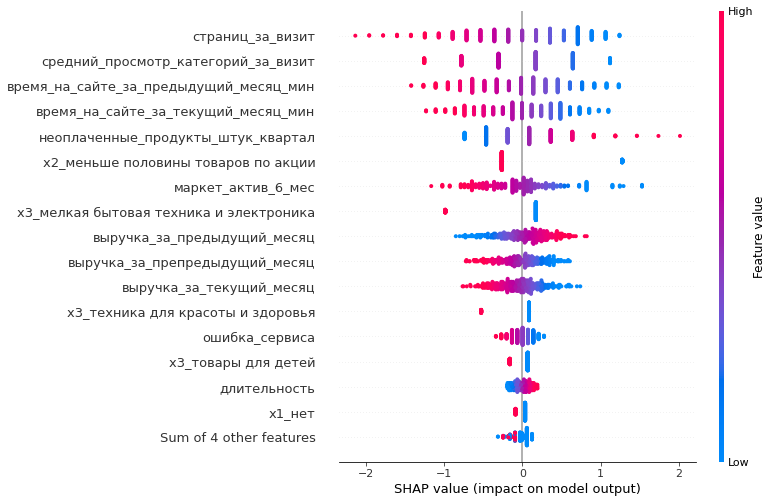

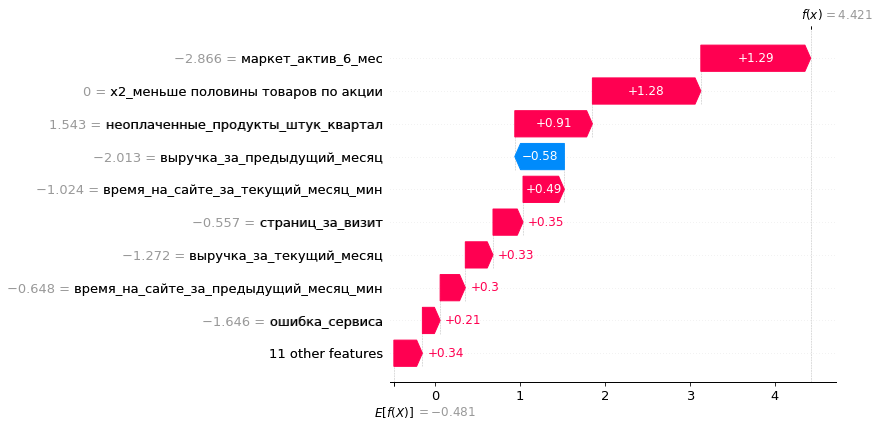

In [95]:
explainer = shap.LinearExplainer(model, X_test)
shap_values = explainer(X_test)

shap.plots.beeswarm(shap_values,max_display=17) 
shap.plots.waterfall(shap_values[1]) 

<div class="alert alert-info">
<b>Вывод главы:</b>
<br>Пять самыйх важных для модели признаков это: cтраниц_за_визит, cредний_просмотр_категорий_за_визит, время_на_сайте_за_предыдущий_месяц_мин , время_на_сайте_за_текущий_месяц_мин, неоплаченные_продукты_штук_квартал.
</div>

## Сегментация покупателей

<div class="alert alert-info">
<b>Коментарий:</b>
<br>Начнем сигментацию с того что предскажем покупательскую активность и объеденим таблицы 'data' и 'data_4'
</div>

In [96]:
X_ohe = encoder.fit_transform(X[cat_col_names])
encoder_col_names = encoder.get_feature_names()
X_ohe = df.DataFrame(X_ohe, columns=encoder_col_names)

X_scaled = scaler.fit_transform(X[num_col_names])
X_scaled = df.DataFrame(X_scaled, columns=num_col_names)

X = df.concat([X_ohe, X_scaled], axis=1)

predictions = model.predict(X)

In [97]:
data['предсказание_вероятности_снижения_покупательской_активности'] = predictions

def ver (p):
    if p == 'снизилась':
        return  'снизится'
    if p =='прежний уровень':
        return 'останется на прежнем уровне'
data['предсказание_вероятности_снижения_покупательской_активности'] = data['предсказание_вероятности_снижения_покупательской_активности'].apply(ver)

data_4 = data_4.set_index('id')
data = df.merge(data, data_4, on="id")

data.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,cредний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,cтраниц_за_визит,выручка_за_предыдущий_месяц,выручка_за_препредыдущий_месяц,выручка_за_текущий_месяц,время_на_сайте_за_предыдущий_месяц_мин,время_на_сайте_за_текущий_месяц_мин,предсказание_вероятности_снижения_покупательской_активности,прибыль
id,,,,,,,,,,,,,,,,,,,
215349,снизилась,премиум,да,4.4,4,819,больше половины товаров по акции,товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,снизится,4.16
215350,снизилась,стандарт,нет,4.9,3,539,меньше половины товаров по акции,домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,останется на прежнем уровне,3.13
215351,снизилась,стандарт,да,3.2,5,896,больше половины товаров по акции,товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,снизится,4.87
215352,снизилась,стандарт,нет,5.1,3,1064,больше половины товаров по акции,товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,снизится,4.21
215353,снизилась,стандарт,да,3.3,4,762,меньше половины товаров по акции,домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10,снизится,3.95


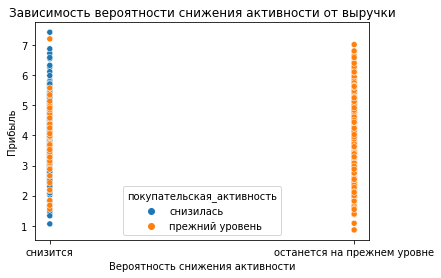

In [98]:
sns.scatterplot(data=data, y='прибыль', x='предсказание_вероятности_снижения_покупательской_активности',hue="покупательская_активность")
plt.xlabel('Вероятность снижения активности')
plt.ylabel('Прибыль')
plt.title('Зависимость вероятности снижения активности от выручки')
plt.show()

<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br>Не особо заметно что выручка влияет на покупательскую активность.
</div>

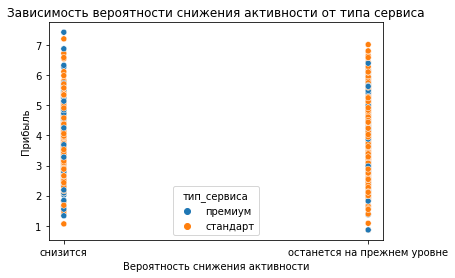

In [99]:
sns.scatterplot(data=data, y='прибыль', x='предсказание_вероятности_снижения_покупательской_активности',hue="тип_сервиса")
plt.xlabel('Вероятность снижения активности')
plt.ylabel('Прибыль')
plt.title('Зависимость вероятности снижения активности от типа сервиса')
plt.show()

<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br>Тип сервиса почти расспределён равномерно.
</div>

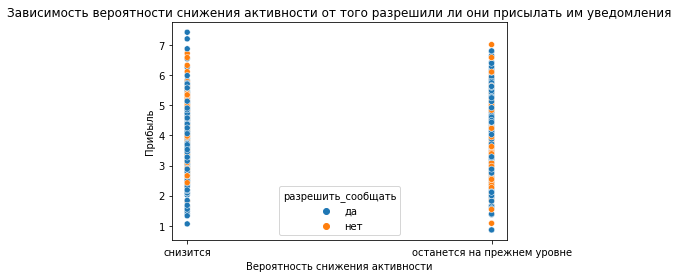

In [100]:
sns.scatterplot(data=data, y='прибыль', x='предсказание_вероятности_снижения_покупательской_активности',hue="разрешить_сообщать")
plt.xlabel('Вероятность снижения активности')
plt.ylabel('Прибыль')
plt.title('Зависимость вероятности снижения активности от того разрешили ли они присылать им уведомления')
plt.show()

<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br>Разрешение на отправку уведомлений расспределены почти равномерно.
</div>

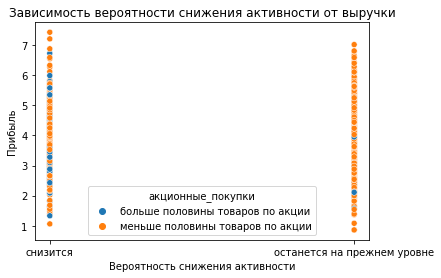

In [101]:
sns.scatterplot(data=data, y='прибыль', x='предсказание_вероятности_снижения_покупательской_активности',hue="акционные_покупки")
plt.xlabel('Вероятность снижения активности')
plt.ylabel('Прибыль')
plt.title('Зависимость вероятности снижения активности от выручки')
plt.show()

<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br>Видно как товары по акции немного сильнее влияют на активность покупателей. Хоть график и похож на график с уведомлениями, будет лучше взять график именно с акциями так как зачастую именно они решают главную роль в покупке товара.
</div>

<div class="alert alert-info">
<b>Коментарий:</b>
<br>Создадим новый столбец где поделим пользователей на нужный сегмент и остальных.
</div>

In [102]:
data['сегмент'] = data.apply( lambda row: 'сегмент' if row['предсказание_вероятности_снижения_покупательской_активности'] == 'останется на прежнем уровне' and row['акционные_покупки']=='больше половины товаров по акции' else 'Остальные пользователи', axis=1)
data.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,cредний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,cтраниц_за_визит,выручка_за_предыдущий_месяц,выручка_за_препредыдущий_месяц,выручка_за_текущий_месяц,время_на_сайте_за_предыдущий_месяц_мин,время_на_сайте_за_текущий_месяц_мин,предсказание_вероятности_снижения_покупательской_активности,прибыль,сегмент
id,,,,,,,,,,,,,,,,,,,,
215349,снизилась,премиум,да,4.4,4,819,больше половины товаров по акции,товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,снизится,4.16,Остальные пользователи
215350,снизилась,стандарт,нет,4.9,3,539,меньше половины товаров по акции,домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,останется на прежнем уровне,3.13,Остальные пользователи
215351,снизилась,стандарт,да,3.2,5,896,больше половины товаров по акции,товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,снизится,4.87,Остальные пользователи
215352,снизилась,стандарт,нет,5.1,3,1064,больше половины товаров по акции,товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,снизится,4.21,Остальные пользователи
215353,снизилась,стандарт,да,3.3,4,762,меньше половины товаров по акции,домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10,снизится,3.95,Остальные пользователи


In [103]:
data_s = data[data['сегмент'] == 'сегмент']

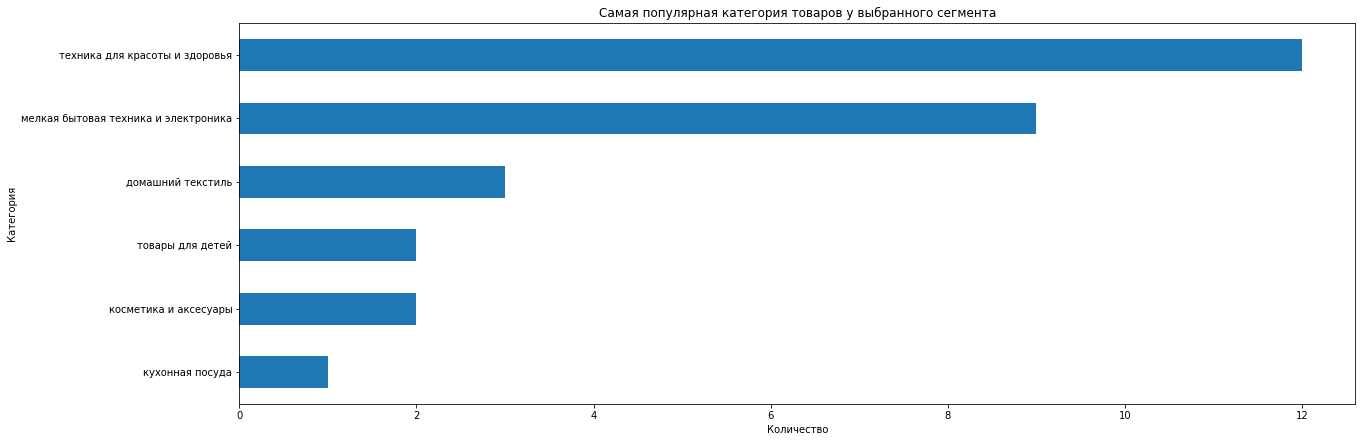

In [104]:
plots(data_s['популярная_категория'],'Количество','Категория', 'Самая популярная категория товаров у выбранного сегмента', 20, 7)

<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br>Самая популярная категория которую берет выделенный сегмент покупателей - техника для красоты и здоровья.
</div>

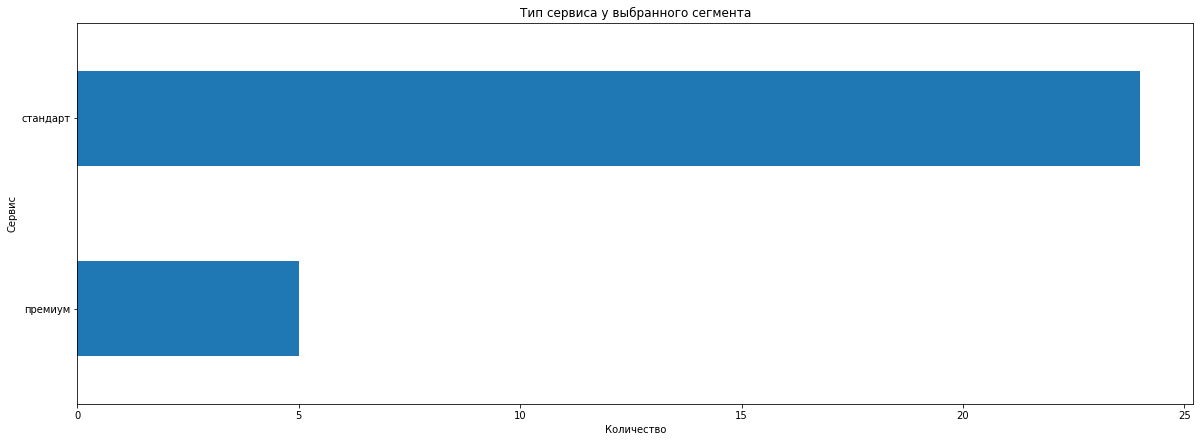

In [105]:
plots(data_s['тип_сервиса'],'Количество','Сервис', 'Тип сервиса у выбранного сегмента', 20, 7)

<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br>Выделенный сегмент покупателей почти не пользуется подпиской.
</div>

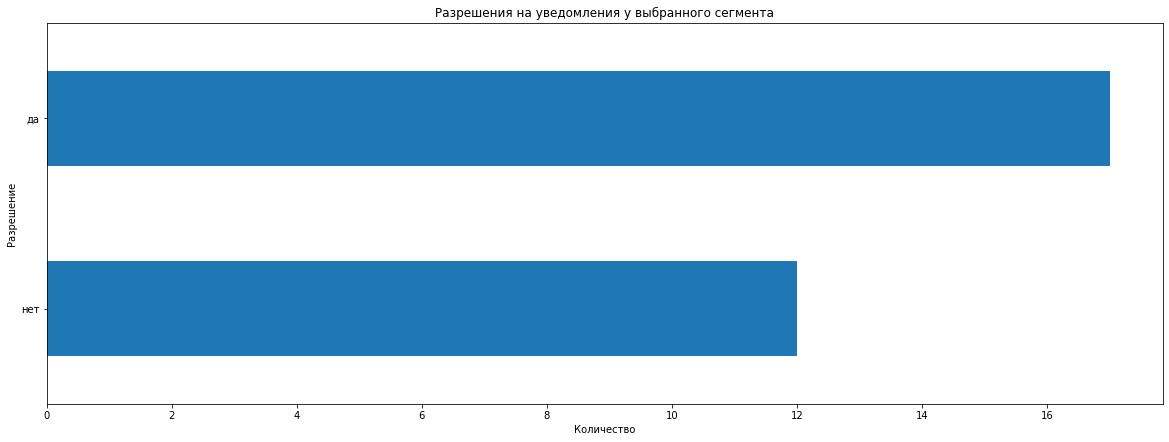

In [106]:
plots(data_s['разрешить_сообщать'],'Количество','Разрешение', 'Разрешения на уведомления у выбранного сегмента', 20, 7)

<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br>Чуть больше половины покупателей согласны на рассылку уведомлений.
</div>

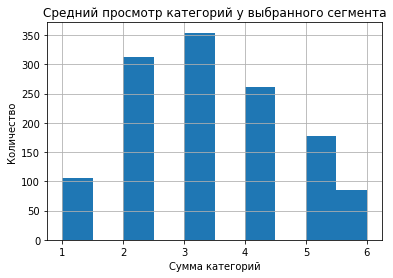

In [107]:
descrebes(data['cредний_просмотр_категорий_за_визит'],"Средний просмотр категорий у выбранного сегмента","Сумма категорий","Количество")

<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br>В основном выбранный сегмент покупателей просмотривает 2 - 3 категории.
</div>

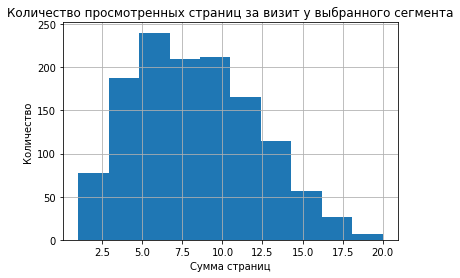

In [108]:
descrebes(data['cтраниц_за_визит'],"Количество просмотренных страниц за визит у выбранного сегмента","Сумма страниц","Количество")

<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br>Для совершения покупок покупатели в основном просматривают 5 страниц.
</div>

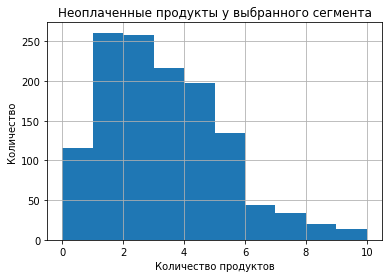

In [109]:
descrebes(data['неоплаченные_продукты_штук_квартал'],"Неоплаченные продукты у выбранного сегмента","Количество продуктов","Количество")

<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br>Покупатели забывают оплатить в среднем 2 товара.
</div>

<div class="alert alert-info">
<b>Вывод главы:</b>
<br>Был выбран главный сегмент для анализа - это покупатели кторые совершают много покупок по акции и у которых не снизится покупательская активность. 
<br>У сегмента были проанализированны группы клиентов. 
<br>1. Группа клиентов которые покупают самый популярный товар по акции - техника для красоты и здоровья. Таким клиентам можно предложить путем уведомлений больше подобного товара а так-же напомнить о существовании иных товаров на сайте.
<br>2. Покупатели еоторые не пользуются подпиской. Так как сегмент формировался из покупателей которые берут товары по акции нужно донести до покупателей выгоду приобретения подписки.
<br>3. Покупатели сегмента просматривают по 3 категории и 5 страниц за посещение это не много и может быть недостаточно что-бы они задержали внимание на других товарах, так-как такое расспределение может указывать что они покупают одни и те-же товары.   
</div>

## Общий вывод

<div class="alert alert-info">
<br>Были созданы 4 таблицы - 'data_1', 'data_2', 'data_3', 'data_4', все 4 таблиц были проверены на пропуски и дубликаты а так-же избавленны от них. 
<br>Был проведен исследовательский анализ данных который выявил среднестатическокго покупателя маркетплэйса - среднестатистический пользователь сайта посещяет его 10 - 15 минут. За это время он посещает 6 страниц с товаром, и может добавить в корзину товаров из 3х основных категорий (товары для детей, домашний текстиль, косметика и аксесуары).
<br>Таблицы 'data_1', 'data_2', 'data_3' были объеденены в одну таблицу 'data'
<br>Был проведен кореляционный анализ данных где выяснилось что больше всего на корреляцию влияет 4 признака:
<br>1.'выручка_за_предыдущий_месяц'
<br>2.'выручка_за_препредыдущий_месяц'
<br>3.'cтраниц_за_визит'
<br>4.'выручка_за_текущий_месяц'
<br>Был создан пайплайн который выявил лучшую модель - LogisticRegression(C=2, penalty='l1', random_state=42, solver='liblinear') и её метрику - 0.89.
<br>ROC-AUC модели - 0.91
<br>F1-score модели - 0.88
<br>Лучшая модель была обучена и применена к датасету. Так-же был проведен анализ важности признаковБ который выявил 5 лучших признаков для модели - cтраниц_за_визит, cредний_просмотр_категорий_за_визит, время_на_сайте_за_предыдущий_месяц_мин , время_на_сайте_за_текущий_месяц_мин, неоплаченные_продукты_штук_квартал.
<br>Был выбран главный сегмент для анализа - это покупатели кторые совершают много покупок по акции и у которых не снизится покупательская активность.
У сегмента были проанализированны группы клиентов.
1. Группа клиентов которые покупают самый популярный товар по акции - техника для красоты и здоровья. Таким клиентам можно предложить путем уведомлений больше подобного товара а так-же напомнить о существовании иных товаров на сайте.
2. Покупатели еоторые не пользуются подпиской. Так как сегмент формировался из покупателей которые берут товары по акции нужно донести до покупателей выгоду приобретения подписки.
3. Покупатели сегмента просматривают по 3 категории и 5 страниц за посещение это не много и может быть недостаточно что-бы они задержали внимание на других товарах, так-как такое расспределение может указывать что они покупают одни и те-же товары.
</div>